In [24]:
import json
import pandas as pd
import numpy as np
import os
import glob
import re

from datetime import datetime, timedelta
from dotenv import load_dotenv

from sqlalchemy import create_engine
import psycopg2

# from .env import db info
load_dotenv()

db_password = os.getenv("db_password")
db_username = os.getenv("db_username")
db_url = os.getenv("db_url")
db_port = os.getenv("db_port")
db_name = os.getenv("db_name")
db_table = os.getenv("db_table")

import matplotlib.pyplot as plt

import time

In [116]:
def get_data(cutoff_date):
    #create the connection to the PostgreSQL database, then add the movies_df DataFrame to a SQL database.
    db_string = f"postgresql://{db_username}:{db_password}@{db_url}:{db_port}/{db_name}"
    engine = create_engine(db_string)
    
    if cutoff_date == 'all':
        return pd.read_sql(f"SELECT * FROM {db_table}", con=engine)
    else:
        return pd.read_sql(f"SELECT * FROM {db_table} WHERE depart_date < '{cutoff_date}'", con=engine)

In [82]:
def plot_trip(trip_string):
    
    trip_df = df.loc[df["trip_id"].str.contains(trip_string)]
    
    trip_IDs = trip_df["trip_id"].unique()
    
    plt.rcParams["figure.figsize"] = (16,8)
    for trip in trip_IDs:
        plt.plot(trip_df["time_stamp"].loc[trip_df["trip_id"]==trip],trip_df["total_cost"].loc[trip_df["trip_id"]==trip])

    plt.xticks(rotation = 45)

    plt.legend(trip_IDs)
    plt.show()
    
    plt.scatter(trip_df['days_before_purchase'],trip_df['total_cost'])
    plt.show()

In [117]:
df = get_data('all')

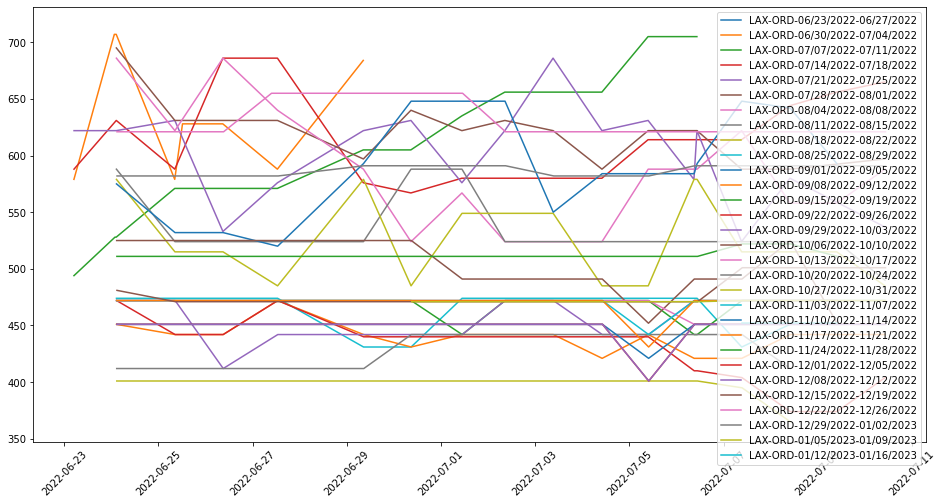

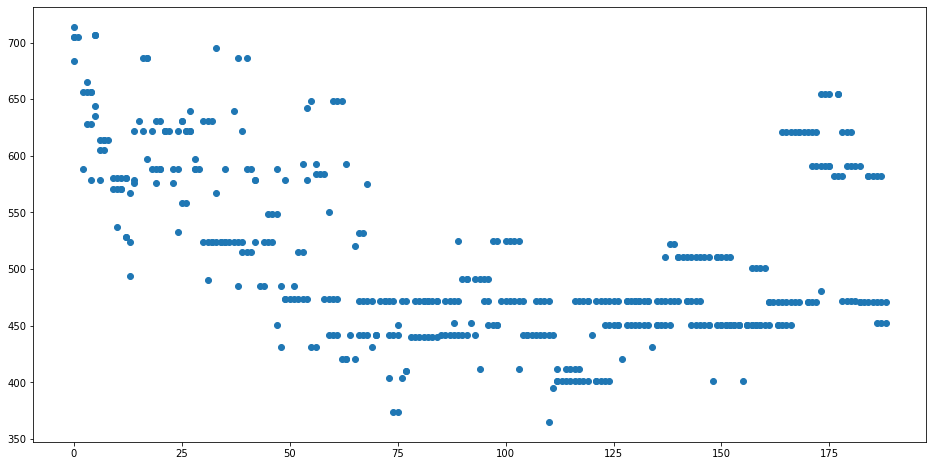

In [118]:
plot_trip("LAX-ORD")

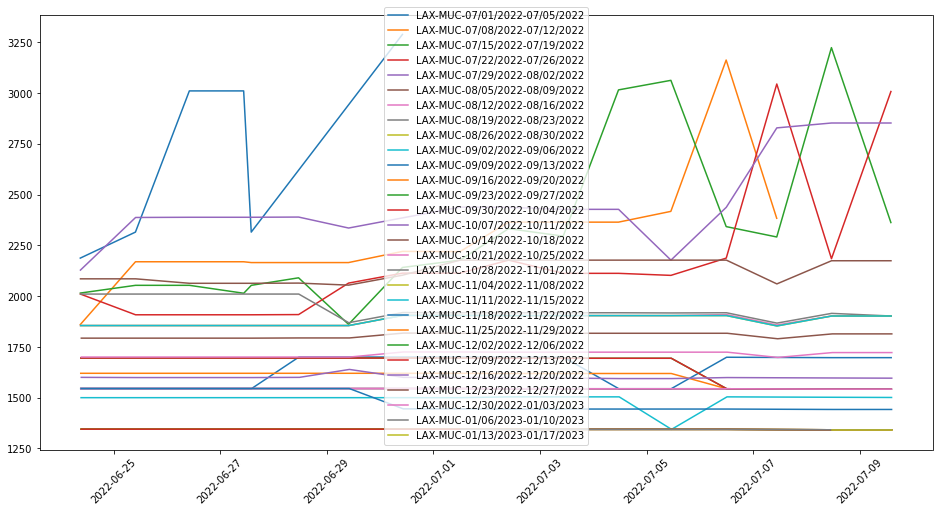

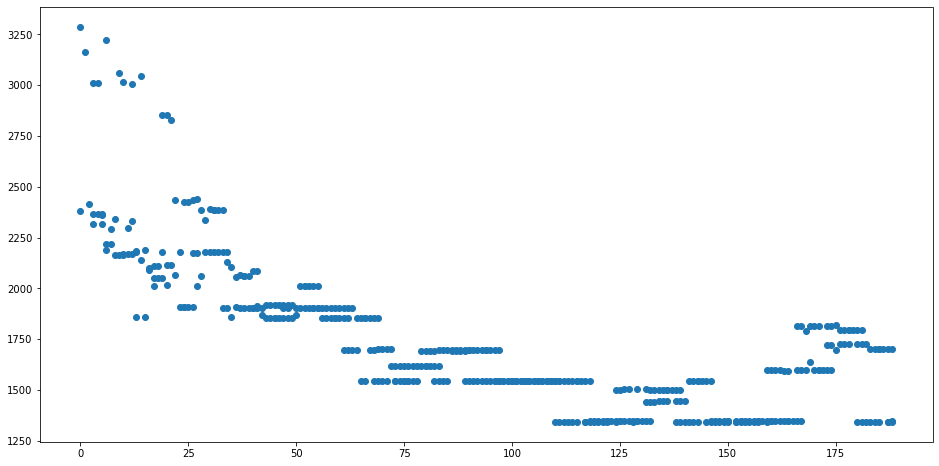

In [119]:
plot_trip("LAX-MUC")

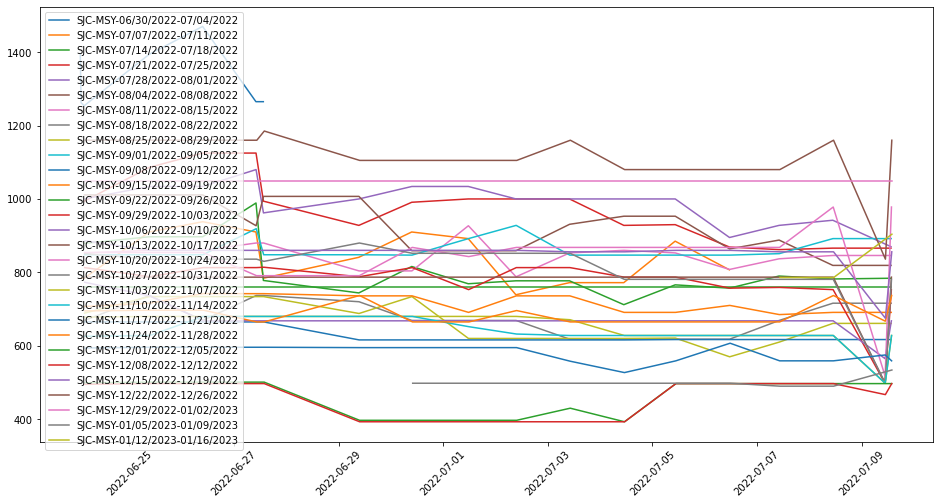

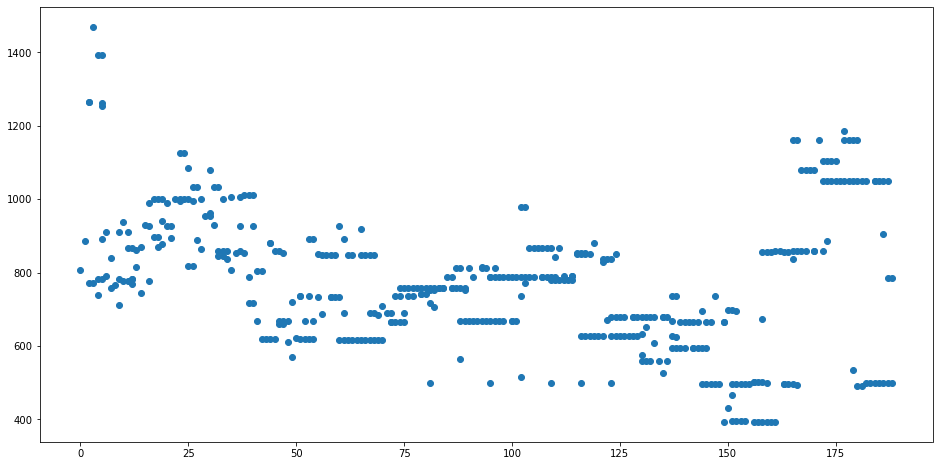

In [120]:
plot_trip("SJC-MSY")

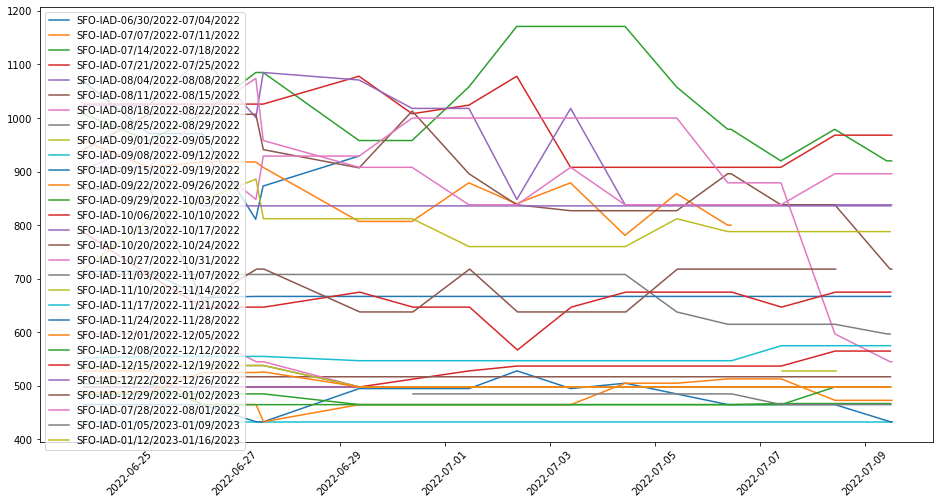

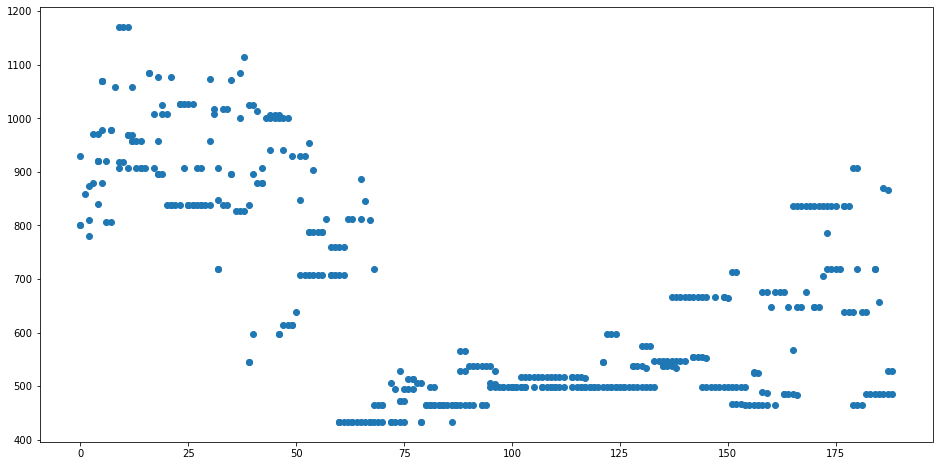

In [121]:
plot_trip("SFO-IAD")

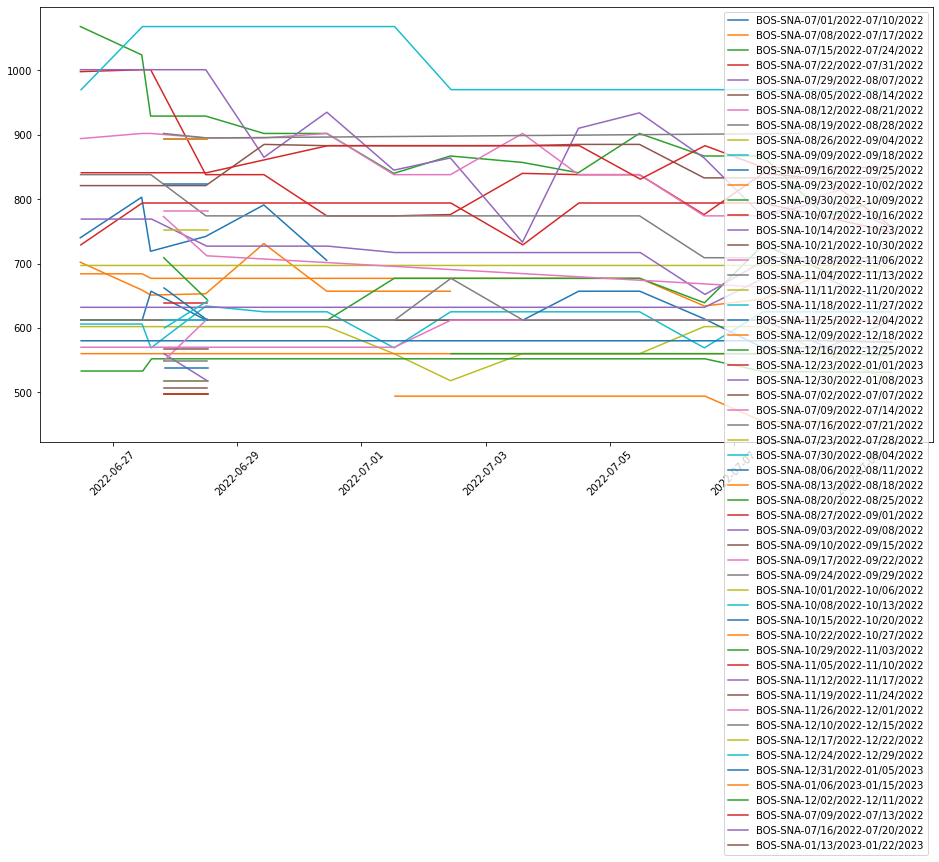

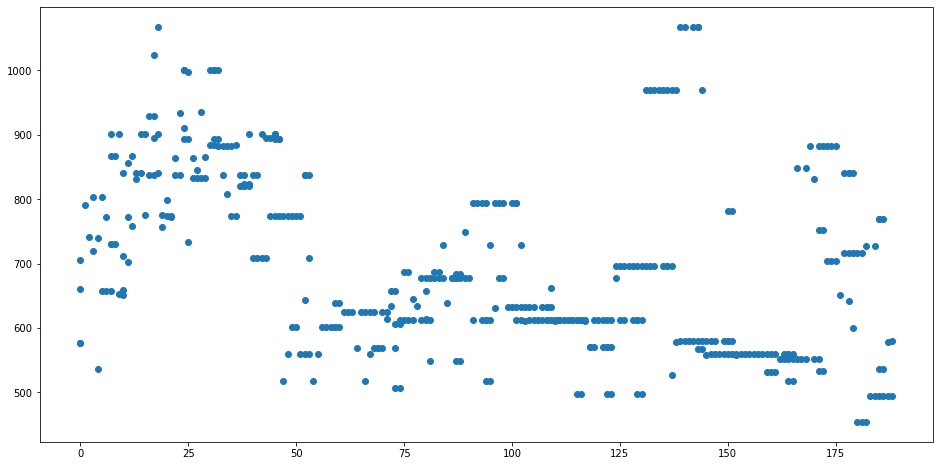

In [122]:
plot_trip("BOS-SNA")

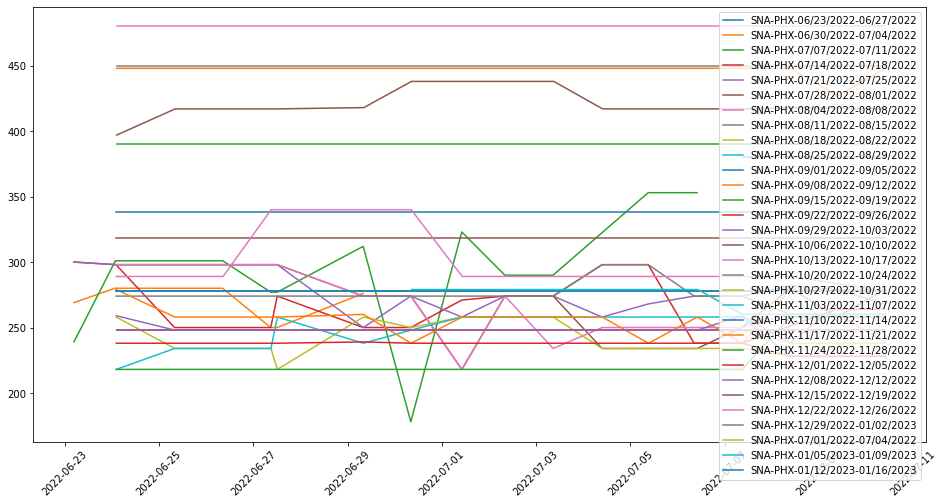

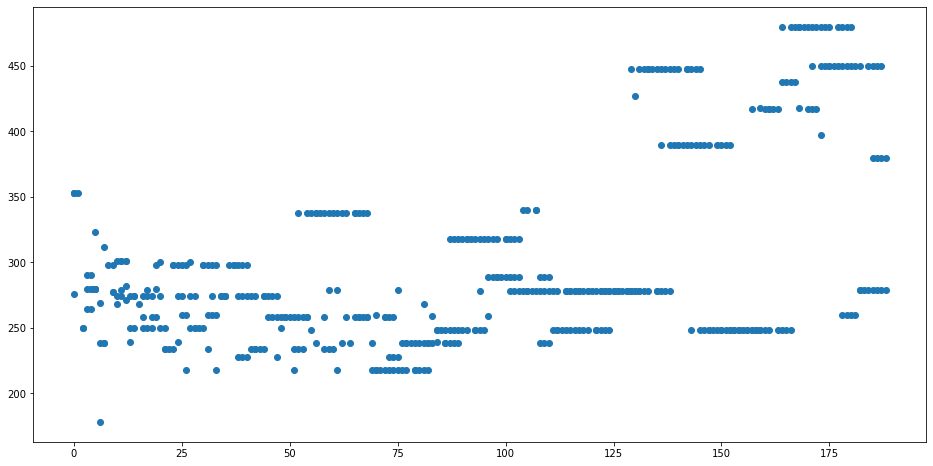

In [123]:
plot_trip("SNA-PHX")